In [ ]:
import numpy as np
import anndata as ad 
from ripser import ripser 
from os.path import join
from topo import viz
from totopos import cells as tpc
from totopos.topology import neighborhood
from sklearn.decomposition import PCA
from matplotlib import pyplot as plt
from topo import stats
import pandas as pd
import seaborn as sns
from topo import viz
viz.set_plotting_style_plt()
cat = np.concatenate

base_dir = "/home/mnu/projects/topo/data"
pd_pal = ["#212b61", "#000000"]
fig_dir = "/home/mnu/projects/topo/figs/paper_figs/cnidarian_story/"

hy_dir = join(base_dir, "hydra")
nve_dir = join(base_dir, "nematostella")
cly_dir = join(base_dir, "clytia")
xen_dir = join(base_dir, "xenia")
sty_dir = join(base_dir, "stylophora")

# Load data
hy = ad.read_h5ad(join(hy_dir, "hydra_nematocytes.h5ad"))
nve = ad.read_h5ad(join(nve_dir, "nve_cnidocytes.h5ad"))
cly = ad.read_h5ad(join(cly_dir, "clytia_cnidocytes.h5ad"))
xen = ad.read_h5ad(join(xen_dir, "xenia_hvg_ct.h5ad"))
xen = xen[xen.obs.cell_type == "cnidocyte"].copy()
sty = ad.read_h5ad(join(sty_dir, "stylophora_hvg_ct.h5ad"))
sty = sty[sty.obs.cell_type == "cnido"].copy()

### Compute PCA 

In [11]:
pca_hy = PCA()
pca_hy = pca_hy.fit(hy.X.A)
pcs_hy = pca_hy.fit_transform(hy.X.A)

pca_nve = PCA()
pca_nve = pca_nve.fit(nve.X.A)
pcs_nve = pca_nve.fit_transform(nve.X.A)

pca_cly = PCA()
pca_cly = pca_cly.fit(cly.X.A)
pcs_cly = pca_cly.fit_transform(cly.X.A)

pca_xen = PCA()
pca_xen = pca_xen.fit(xen.X.A)
pcs_xen = pca_xen.fit_transform(xen.X.A)

pca_sty = PCA()
pca_sty = pca_sty.fit(sty.X.A)
pcs_sty = pca_sty.fit_transform(sty.X.A)

### PH on 20 pcs

In [ ]:
# Run PH
ph_hy_20 = ripser(pcs_hy[:, :20], do_cocycles=True)
ph_nve_20 = ripser(pcs_nve[:, :20], do_cocycles=True)
ph_cly_20 = ripser(pcs_cly[:, :20], do_cocycles=True)
ph_xen_20 = ripser(pcs_xen[:, :20], do_cocycles=True)
ph_sty_20 = ripser(pcs_sty[:, :20], do_cocycles=True)

In [ ]:
neighborhood_size = 200

# Run neighborhood threshold 
nbd_thresh_hy_20, _ = neighborhood.largest_neighborhood_lifetime(
    pcs_hy[:, :20], n_clusters=hy.n_obs // neighborhood_size
)
nbd_thresh_nve_20, _ = neighborhood.largest_neighborhood_lifetime(
    pcs_nve[:, :20], n_clusters=nve.n_obs // neighborhood_size
)
nbd_thresh_cly_20, _ = neighborhood.largest_neighborhood_lifetime(
    pcs_cly[:, :20], n_clusters=cly.n_obs // neighborhood_size
)
nbd_thresh_xen_20, _ = neighborhood.largest_neighborhood_lifetime(
    pcs_xen[:, :20], n_clusters=xen.n_obs // neighborhood_size
)
nbd_thresh_sty_20, _ = neighborhood.largest_neighborhood_lifetime(
    pcs_sty[:, :20], n_clusters=sty.n_obs // neighborhood_size
)

In [38]:
# print number of prominent feats 
lifetimes_hy_20 = ph_hy_20["dgms"][1][:, 1] - ph_hy_20["dgms"][1][:, 0]
n_prominent_feats_hy_20 = sum(lifetimes_hy_20 >= 2*nbd_thresh_hy_20)
print(f"Found {n_prominent_feats_hy_20} for Hydra cnidocytes on 20 PCs")

lifetimes_nve_20 = ph_nve_20["dgms"][1][:, 1] - ph_nve_20["dgms"][1][:, 0]
n_prominent_feats_nve_20 = sum(lifetimes_nve_20 >= 2*nbd_thresh_nve_20)
print(f"Found {n_prominent_feats_nve_20} for Nematostella cnidocytes on 20 PCs")

lifetimes_cly_20 = ph_cly_20["dgms"][1][:, 1] - ph_cly_20["dgms"][1][:, 0]
n_prominent_feats_cly_20 = sum(lifetimes_cly_20 >= 2*nbd_thresh_cly_20)
print(f"Found {n_prominent_feats_cly_20} for Clytia cnidocytes on 20 PCs")

lifetimes_xen_20 = ph_xen_20["dgms"][1][:, 1] - ph_xen_20["dgms"][1][:, 0]
n_prominent_feats_xen_20 = sum(lifetimes_xen_20 >= 2*nbd_thresh_xen_20)
print(f"Found {n_prominent_feats_xen_20} for Xenia cnidocytes on 20 PCs")

lifetimes_sty_20 = ph_sty_20["dgms"][1][:, 1] - ph_sty_20["dgms"][1][:, 0]
n_prominent_feats_sty_20 = sum(lifetimes_sty_20 >= 2*nbd_thresh_sty_20)
print(f"Found {n_prominent_feats_sty_20} for Stylophora cnidocytes on 20 PCs")

Found 1 for Hydra cnidocytes on 20 PCs
Found 2 for Nematostella cnidocytes on 20 PCs
Found 1 for Clytia cnidocytes on 20 PCs
Found 0 for Xenia cnidocytes on 20 PCs
Found 0 for Stylophora cnidocytes on 20 PCs


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


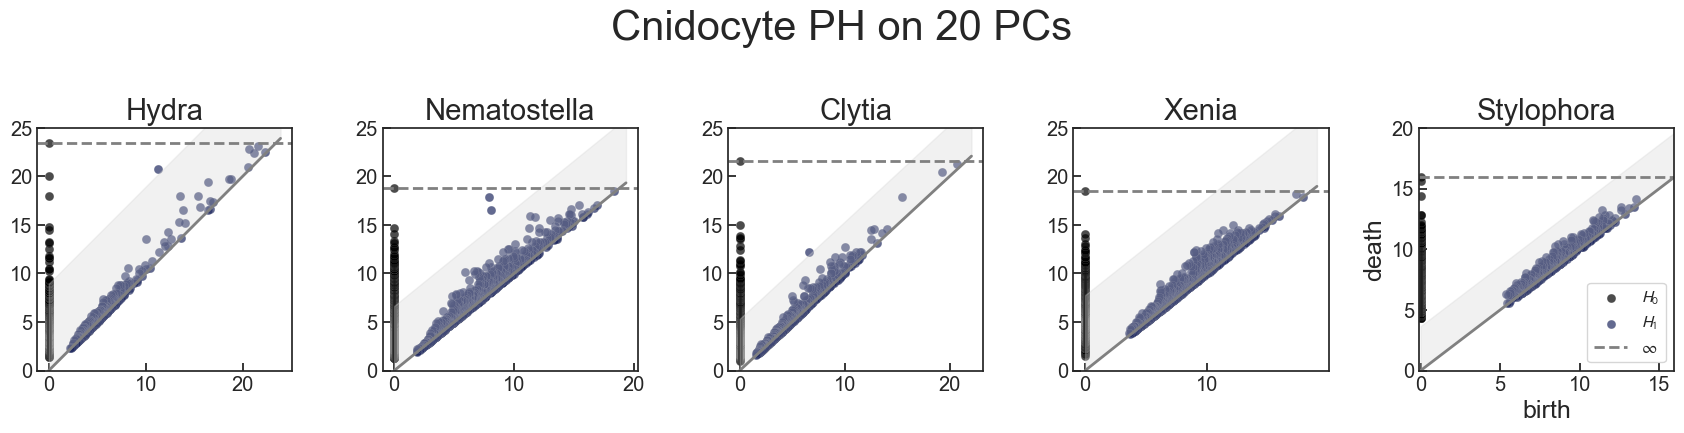

In [58]:
# visualize 
fig, axes = plt.subplots(1, 5, figsize=(17, 4.4))

plot_pers_diag_ripser(ph_hy_20["dgms"], conf_int=2*nbd_thresh_hy_20, pal=pd_pal, ax=axes[0])
axes[0].set_title("Hydra")
axes[0].set_ylim(0, 25)

plot_pers_diag_ripser(ph_nve_20["dgms"], conf_int=2*nbd_thresh_nve_20, pal=pd_pal, ax=axes[1])
axes[1].set_title("Nematostella")
axes[1].set_ylim(0, 25)

plot_pers_diag_ripser(ph_cly_20["dgms"], conf_int=2*nbd_thresh_cly_20, pal=pd_pal, ax=axes[2])
axes[2].set_title("Clytia")
axes[2].set_ylim(0, 25)

plot_pers_diag_ripser(ph_xen_20["dgms"], conf_int=2*nbd_thresh_xen_20, pal=pd_pal, ax=axes[3])
axes[3].set_title("Xenia")
axes[3].set_ylim(0, 25)

plot_pers_diag_ripser(ph_sty_20["dgms"], conf_int=2*nbd_thresh_sty_20, pal=pd_pal, ax=axes[4])
axes[4].set_title("Stylophora")
axes[4].set_ylim(0, 20)

fig.suptitle("Cnidocyte PH on 20 PCs", fontsize=30)
fig.tight_layout(rect=[0, 0, 1, 0.95])
fig.savefig(join(fig_dir, "pd_cnido_20_pcs_grid.png"), dpi=320, bbox_inches="tight")
fig.savefig(join(fig_dir, "pd_cnido_20_pcs_grid.pdf"), dpi=320, bbox_inches="tight")

In [52]:
pd_pal

['#212b61', '#000000']

### PH on 5 PCS

In [ ]:
# Run PH on 5 PCs
ph_hy_5 = ripser(pcs_hy[:, :5], do_cocycles=True)
ph_nve_5 = ripser(pcs_nve[:, :5], do_cocycles=True)
ph_cly_5 = ripser(pcs_cly[:, :5], do_cocycles=True)
ph_xen_5 = ripser(pcs_xen[:, :5], do_cocycles=True)
ph_sty_5 = ripser(pcs_sty[:, :5], do_cocycles=True)

In [ ]:
# Run neighborhood threshold 
nbd_thresh_hy_5, _ = neighborhood.largest_neighborhood_lifetime(
    pcs_hy[:, :5], n_clusters=hy.n_obs // neighborhood_size
)
nbd_thresh_nve_5, _ = neighborhood.largest_neighborhood_lifetime(
    pcs_nve[:, :5], n_clusters=nve.n_obs // neighborhood_size
)
nbd_thresh_cly_5, _ = neighborhood.largest_neighborhood_lifetime(
    pcs_cly[:, :5], n_clusters= cly.n_obs // neighborhood_size
)
nbd_thresh_xen_5, _ = neighborhood.largest_neighborhood_lifetime(
    pcs_xen[:, :5], n_clusters=xen.n_obs // neighborhood_size
)
nbd_thresh_sty_5, _ = neighborhood.largest_neighborhood_lifetime(
    pcs_sty[:, :5], n_clusters= sty.n_obs // neighborhood_size
)

In [45]:
# print number of prominent feats 
lifetimes_hy_5 = ph_hy_5["dgms"][1][:, 1] - ph_hy_5["dgms"][1][:, 0]
n_prominent_feats_hy_5 = sum(lifetimes_hy_5 >= 2*nbd_thresh_hy_5)
print(f"Found {n_prominent_feats_hy_5} for Hydra cnidocytes on 5 PCs")

lifetimes_nve_5 = ph_nve_5["dgms"][1][:, 1] - ph_nve_5["dgms"][1][:, 0]
n_prominent_feats_nve_5 = sum(lifetimes_nve_5 >= 2*nbd_thresh_nve_5)
print(f"Found {n_prominent_feats_nve_5} for Nematostella cnidocytes on 5 PCs")

lifetimes_cly_5 = ph_cly_5["dgms"][1][:, 1] - ph_cly_5["dgms"][1][:, 0]
n_prominent_feats_cly_5 = sum(lifetimes_cly_5 >= 2*nbd_thresh_cly_5)
print(f"Found {n_prominent_feats_cly_5} for Clytia cnidocytes on 5 PCs")

lifetimes_xen_5 = ph_xen_5["dgms"][1][:, 1] - ph_xen_5["dgms"][1][:, 0]
n_prominent_feats_xen_5 = sum(lifetimes_xen_5 >= 2*nbd_thresh_xen_5)
print(f"Found {n_prominent_feats_xen_5} for Xenia cnidocytes on 5 PCs")

lifetimes_sty_5 = ph_sty_5["dgms"][1][:, 1] - ph_sty_5["dgms"][1][:, 0]
n_prominent_feats_sty_5 = sum(lifetimes_sty_5 >= 2*nbd_thresh_sty_5)
print(f"Found {n_prominent_feats_sty_5} for Stylophora cnidocytes on 5 PCs")

Found 2 for Hydra cnidocytes on 5 PCs
Found 2 for Nematostella cnidocytes on 5 PCs
Found 1 for Clytia cnidocytes on 5 PCs
Found 1 for Xenia cnidocytes on 5 PCs
Found 0 for Stylophora cnidocytes on 5 PCs


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


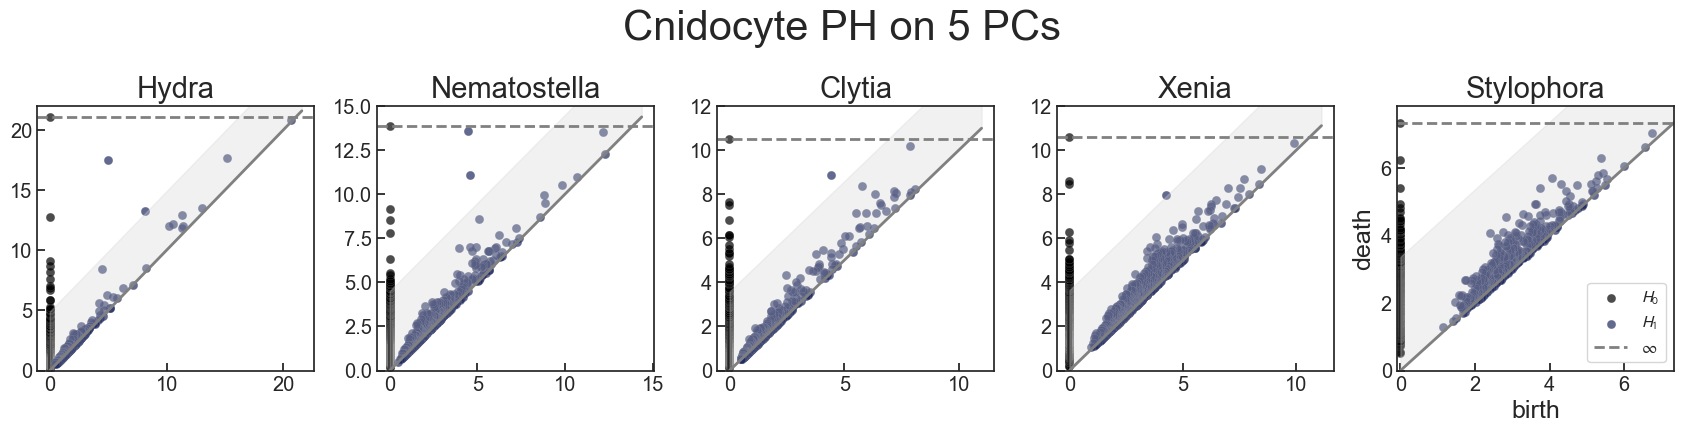

In [59]:
# visualize 
fig, axes = plt.subplots(1, 5, figsize=(17, 4.4))

plot_pers_diag_ripser(ph_hy_5["dgms"], conf_int=2*nbd_thresh_hy_5, pal=pd_pal, ax=axes[0])
axes[0].set_title("Hydra")
axes[0].set_ylim(0,22)

plot_pers_diag_ripser(ph_nve_5["dgms"], conf_int=2*nbd_thresh_nve_5, pal=pd_pal, ax=axes[1])
axes[1].set_title("Nematostella")
axes[1].set_ylim(0,15)

plot_pers_diag_ripser(ph_cly_5["dgms"], conf_int=2*nbd_thresh_cly_5, pal=pd_pal, ax=axes[2])
axes[2].set_title("Clytia")
axes[2].set_ylim(0,12)

plot_pers_diag_ripser(ph_xen_5["dgms"], conf_int=2*nbd_thresh_xen_5, pal=pd_pal, ax=axes[3])
axes[3].set_title("Xenia")
axes[3].set_ylim(0,12)

plot_pers_diag_ripser(ph_sty_5["dgms"], conf_int=2*nbd_thresh_sty_5, pal=pd_pal, ax=axes[4])
axes[4].set_title("Stylophora")

fig.suptitle("Cnidocyte PH on 5 PCs", fontsize=30)
fig.tight_layout(rect=[0, 0, 1, 0.95])

fig.tight_layout()
fig.savefig(join(fig_dir, "pd_cnido_5_pcs_grid.png"), dpi=320, bbox_inches="tight")
fig.savefig(join(fig_dir, "pd_cnido_5_pcs_grid.pdf"), dpi=320, bbox_inches="tight")